In [1]:
#Some Basic Imports
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Input
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
np.random.seed(123)
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras import regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import load_model
import pandas as pd
import urllib, os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.preprocessing import LabelBinarizer
import glob
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Input, concatenate

from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, RMSprop
import argparse
import locale
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras import regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
import tensorflow as tf
#import tensorflow.keras.applications.InceptionV3
#import tensorflow.keras.applications.inception_v3.preprocess_input

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)
#Define Directories for train, test & Validation Set
image_folder = 'dataset2/'
image_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        image_folder, shuffle=False, class_mode='binary',
        target_size=(299, 299), batch_size=431)

Found 431 images belonging to 2 classes.


In [2]:
image_generator.class_indices


{'covid': 0, 'no finding': 1}

In [3]:
images, labels = next(image_generator)

In [4]:
image_files = pd.Series(image_generator.filenames)
#print(image_files)
image_files = image_files.str.split("\\", expand=True)[1].str[:]
image_files = list(image_files)
no_findings = pd.read_csv('dataset2/no_findings.csv')
no_findings.head()
covid = pd.read_csv('dataset2/metadata.csv')
covid.head()
dataset = no_findings.append(covid)
len(dataset)
dataset.head()
dataset.set_index('filename', inplace=True)
#PA:0 AP:1 MALE:0 Female:1
print(dataset)
#print(image_files)
df_sorted = dataset.reindex(image_files)
print(df_sorted)
from sklearn.model_selection import train_test_split
# Using train_test_split to partition the training and testing structured data attributes and images
(trainAttrX, testAttrX, trainImagesX, testImagesX) = train_test_split(df_sorted, images, test_size=0.25, random_state=42)
trainY = trainAttrX["finding"]
testY = testAttrX["finding"]

                                                    age  gender  view  finding
filename                                                                      
00000002_000.png                                     81       0     0        1
00000005_000.png                                     69       1     0        1
00000005_001.png                                     69       1     1        1
00000005_002.png                                     69       1     1        1
00000005_003.png                                     69       1     0        1
...                                                 ...     ...   ...      ...
covid-19-pneumonia-progression-and-regression-d...   55       0     1        0
covid-19-pneumonia-progression-and-regression-d...   55       0     1        0
covid-19-pneumonia-progression-and-regression-d...   55       0     1        0
covid-19-pneumonia-progression-and-regression-d...   55       0     1        0
01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg           

In [5]:
img_height,img_width = 299,299 
num_classes = 2

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(299,299,3),
    alpha=1.0,
    include_top=False,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=2,
    classifier_activation="sigmoid"
)
base_model.summary()

Model: "mobilenetv2_1.00_299"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 150, 150, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 150, 150, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 150, 150, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [6]:
#image_input = keras.Input(shape=(299, 299, 1), name="img_input")
csv_input = keras.Input(shape=(4, ), name="csv_input")
x1=layers.Dense(16, input_dim=4, activation='relu')(csv_input)
x1=layers.Dense(12, activation='relu')(x1)
x1=layers.Dense(8, activation='relu')(x1)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(8,activation='relu')(x)


model_final = layers.concatenate([x1, x])
output = layers.Dense(activation = 'relu', units=4)(model_final)
output = layers.Dense(activation = 'sigmoid', units=1,name="final_output")(output)
model = keras.Model(inputs=[base_model.input, csv_input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 150, 150, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 150, 150, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 150, 150, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [8]:
from keras.optimizers import Adam, RMSprop
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=opt)
#cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.summary()

In [9]:
model1_history = model.fit([trainImagesX,trainAttrX ], trainY, validation_data=([testImagesX,testAttrX], testY), epochs=100, batch_size=8,callbacks=callbacks_list)

Epoch 1/100
41/41 [==============================] - 16s 201ms/step - loss: 1.3710 - acc: 0.5248 - val_loss: 0.8565 - val_acc: 0.5648
Epoch 2/100
41/41 [==============================] - 5s 124ms/step - loss: 0.6742 - acc: 0.4952 - val_loss: 0.7977 - val_acc: 0.5648
Epoch 3/100
41/41 [==============================] - 5s 129ms/step - loss: 0.6571 - acc: 0.5575 - val_loss: 0.7669 - val_acc: 0.5093
Epoch 4/100
41/41 [==============================] - 5s 127ms/step - loss: 0.6660 - acc: 0.6366 - val_loss: 0.7406 - val_acc: 0.4907
Epoch 5/100
41/41 [==============================] - 5s 124ms/step - loss: 0.6077 - acc: 0.7775 - val_loss: 0.7150 - val_acc: 0.4259
Epoch 6/100
41/41 [==============================] - 5s 126ms/step - loss: 0.6127 - acc: 0.7668 - val_loss: 0.7279 - val_acc: 0.4352
Epoch 7/100
41/41 [==============================] - 5s 126ms/step - loss: 0.5627 - acc: 0.8083 - val_loss: 0.7610 - val_acc: 0.4352
Epoch 8/100
41/41 [==============================] - 5s 127ms/step -

In [40]:
model.save('models/mixed_model_inceptionV3_v1.h5')

In [13]:
def show_cf(y_true, y_pred, class_names, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [14]:

def cnn_evaluation(model, history, train_features, train_images, train_labels, test_features, test_images, test_labels, class_names, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epch = range(1, len(train_acc) + 1)
    plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
    plt.plot(epch, val_acc, 'g', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epch, train_loss, 'r.', label='Training loss')
    plt.plot(epch, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    results_test = model.evaluate([test_features, test_images], test_labels)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_train_pred = np.round(model.predict([train_features, train_images]))
    y_pred = np.round(model.predict([test_features, test_images]))
    
    show_cf(test_labels, y_pred, class_names=class_names, model_name=model_name)
    
    print(classification_report(train_labels, y_train_pred))
    print(classification_report(test_labels, y_pred))

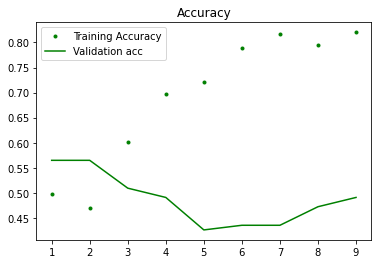

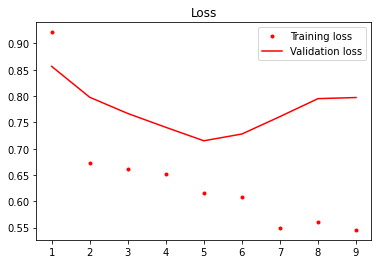

4/4 [==============================] - 1s 214ms/step - loss: 0.7972 - acc: 0.4907
Test Loss: 0.7972195744514465
Test Accuracy: 0.49074074625968933
              precision    recall  f1-score   support

           0       1.00      0.08      0.14       171
           1       0.49      1.00      0.66       152

    accuracy                           0.51       323
   macro avg       0.75      0.54      0.40       323
weighted avg       0.76      0.51      0.38       323

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        61
           1       0.46      1.00      0.63        47

    accuracy                           0.49       108
   macro avg       0.73      0.55      0.40       108
weighted avg       0.77      0.49      0.38       108



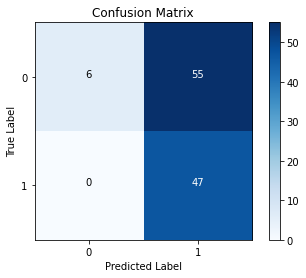

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
cnn_evaluation(model, model1_history, trainImagesX,trainAttrX,trainY,  testImagesX,testAttrX, testY, class_names=['covid', 'no findings'])